## 🧠 **AI & ML INTERNSHIP**

### 🔍 **Hints/Mini Guide:**

1. Choose a binary classification dataset.
2. Train/test split and standardize features.
3. Fit a Logistic Regression model.
4. Evaluate with confusion matrix, precision, recall, ROC-AUC.
5. Tune threshold and explain sigmoid function.

---

### ❓ **Interview Questions:**

1. How does logistic regression differ from linear regression?
2. What is the sigmoid function?
3. What is precision vs recall?
4. What is the ROC-AUC curve?
5. What is the confusion matrix?
6. What happens if classes are imbalanced?
7. How do you choose the threshold?
8. Can logistic regression be used for multi-class problems?

---

### 📚 **Dataset**

You can use any dataset relevant to the task, e.g., Breast Cancer Wisconsin Dataset.

> *Link to download dataset:*
> [https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data](https://www.kaggl                                                                 

Here is all the data you need:
"data.csv"

# 🏡 Housing Data Binary Classification with Logistic Regression
### AI & ML Internship – Task 4

This notebook walks through the steps to build a **binary classification model** using **logistic regression** on the `Housing.csv` dataset. We will follow a well-structured, professional format to ensure clarity, reproducibility, and learning.

### 📌 Objective
- Predict whether a house is considered **Expensive (1)** or **Affordable (0)** based on selected features.
- Implement logistic regression and evaluate it using metrics like **Confusion Matrix**, **ROC-AUC**, and **Precision/Recall**.

### 🛠 Tools Used
- `pandas`, `numpy` for data manipulation
- `matplotlib`, `seaborn` for visualization
- `scikit-learn` for modeling and evaluation


## 📥 Step 1: Import Libraries
Let's start by importing all the necessary Python libraries.

In [31]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

**✅ Output Analysis:**
- Libraries are now imported and ready for use throughout the notebook.

## 📂 Step 2: Load and Explore Dataset
We now load the `Housing.csv` dataset and inspect it to understand its structure and contents.

In [32]:
# Assuming you are running this in Google Colab based on the previous cell
import pandas as pd
import io
from google.colab import files

# Upload CSV file from your local system (only works in Google Colab)
# This code block handles the file upload and loading into a DataFrame.
# Make sure you upload the correct 'data (2).csv' or 'data.csv' file.
uploaded = files.upload()

# Load the uploaded CSV file into DataFrame 'df'
# The key in the 'uploaded' dictionary will be the name of the file you uploaded.
# Adjust 'data (2).csv' if you uploaded a file with a different name.
# Using the first item in the dictionary is generally safe if only one file was uploaded.
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Basic info and preview
df.info()


Saving data.csv to data (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64

**✅ Output Analysis:**
- Check for nulls, data types, and overall shape.
- Helps assess cleaning requirements.

Here's a more attractive and professional version of your markdown section for a Jupyter/Colab notebook:

---

## 🔍 **Step 2: Data Exploration**

### 🎯 **Objective:**

Gain a comprehensive understanding of the dataset’s structure and content.

### 📌 **Tasks to Perform:**

* Inspect the dataset’s shape and data types
* Detect missing or null values
* Generate descriptive statistics for numerical features
* Identify the **target variable** and relevant **features** for modeling

> 📊 This step ensures data quality and informs decisions for preprocessing and model design.

---

Would you like similar enhancements for other notebook sections?


Here’s a professionally refined and visually clear version of your **Reasoning** section, ideal for inclusion in a Colab or Jupyter notebook:

---

### 🧠 **Reasoning Behind This Step**

To effectively prepare the dataset for modeling, it's essential to:

* ✅ **Understand the dataset’s structure** by examining its shape and data types
* ✅ **Check for missing values** that may require cleaning
* ✅ **Review descriptive statistics** to detect data distributions and potential outliers
* ✅ **Identify the target variable** (`diagnosis`) and separate it from features
* ✅ **Handle non-informative columns** such as `'Unnamed: 32'`, which may contain only null values

> This foundational analysis ensures the data is clean, well-understood, and ready for the next preprocessing and modeling steps.

---

Let me know if you want this embedded with code examples or applied to additional sections!


In [33]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types and check for missing values
display(df.info())

# Obtain descriptive statistics for numerical features
display(df.describe())

# Identify the target variable and features
print("\nTarget Variable: diagnosis")
print("\nFeatures:")
print("\nCategorical Features: diagnosis")
numerical_features = df.select_dtypes(include=['number']).columns
print("\nNumerical Features:", numerical_features)

Shape of the DataFrame: (569, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float

None

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN



Target Variable: diagnosis

Features:

Categorical Features: diagnosis

Numerical Features: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


## > 🧭 These insights help ensure your dataset is structured, clean, and suitable for machine learning modeling.

---

## 📘 **Output Description: Data Exploration Step**

### 🔢 `df.describe()` — Descriptive Statistics for Numerical Features:

This method outputs statistical summaries for **numerical columns only**, such as:

* **`mean` (average):** The central tendency of the feature values
* **`std` (standard deviation):** How much values deviate from the mean (higher = more spread out)
* **`min` and `max`:** The smallest and largest values in each feature column
* **`25%`, `50%`, `75%`:** Percentiles —

  * `25%`: First quartile
  * `50%`: Median (middle value)
  * `75%`: Third quartile

**Example Insight from Output (summary-level):**

* Features like `radius_mean`, `area_mean`, and `perimeter_mean` show wide ranges.
* `mean` and `std` help detect scale imbalances — why **standardization** is required later.

---

### 🧩 **Target Variable**

* Identified as: **`diagnosis`**
* Contains **categorical labels**:

  * `'M'` = Malignant (cancerous)
  * `'B'` = Benign (non-cancerous)
* This column is what the model will try to **predict**.

---

### 📈 **Features**

* All columns except:

  * `id`: Just a unique identifier; **not useful** for learning patterns
  * `diagnosis`: The **label** (target)
  * `Unnamed: 32`: An empty column with **no useful data**
* These **feature columns** (like `radius_mean`, `texture_mean`, etc.) are used as **input variables** for the model.

---

### 🧠 **Categorical Feature**

* Only one column: **`diagnosis`**
* It is **non-numeric**, and will need to be **encoded** (e.g., M → 1, B → 0)

---

### ❌ **Why Remove `'Unnamed: 32'`?**

* Detected via `.info()` and `.isnull().all()`
* It contains **only missing (NaN) values**
* It adds **no value** to the dataset and **wastes memory and computation**

> ✅ So, dropping it is a **necessary data-cleaning step** before modeling.

---


## 🧹 Step 3: Data Cleaning and Preprocessing
We will:
- Drop unnecessary columns (if any)
- Encode the target column into binary format
- Prepare features and labels

In [34]:
df
features = df.columns.drop(['id', 'diagnosis', 'Unnamed: 32'])
print(features)
# Handle the 'Unnamed: 32' column (it contains only NaN values)
if df['Unnamed: 32'].isnull().all():
    print("\nThe 'Unnamed: 32' column contains only NaN values and will be dropped.")
    df = df.drop('Unnamed: 32', axis=1)
    display(df.head())
else:
    print("\nThe 'Unnamed: 32' column contains values other than NaN.")

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

The 'Unnamed: 32' column contains only NaN values and will be dropped.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# Check for null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Convert Categorical Features to Numerical Representations
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 3. Split Data into Training and Testing Sets
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

# 4. Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here’s a **clear and professional explanation** of the two connected code blocks.
---

## 📦 **Code Explanation: Data Cleaning & Preprocessing**

---

### 🔹 **Step 1: Feature Selection & Column Cleanup**

### ✅ What This Does:

* **`features = df.columns.drop([...])`:**
  Removes unnecessary columns like:

  * `id`: A unique identifier, irrelevant for learning
  * `diagnosis`: The target label, not a feature
  * `Unnamed: 32`: A useless column filled with NaNs (handled below)

* **`if df['Unnamed: 32'].isnull().all()`**
  Checks if `'Unnamed: 32'` is entirely empty (all values are `NaN`).
  If so:

  * It prints a message.
  * Drops the column from the dataset.
  * Displays the first few cleaned rows using `df.head()`.

---

### 🔹 **Step 2: Encode Labels & Prepare for Modeling**

### ✅ What This Does:

* The `diagnosis` column originally contains **categorical labels**: `'M'` (malignant) and `'B'` (benign).
* `LabelEncoder()` converts them to numeric values:

  * `M → 1`
  * `B → 0`
* This step is essential for machine learning models which expect numerical inputs.

---

### 🔹 **Step 3: Train-Test Split**

### ✅ What This Does:

* `X` contains **independent features** (excluding `diagnosis` and `id`).
* `y` is the **dependent variable** (our target).
* The data is split into:

  * **80% training set**
  * **20% test set**
* `random_state=42` ensures reproducibility.

---

### 🔹 **Step 4: Feature Standardization**

### ✅ What This Does:

* Standardization rescales features so they have:

  * **Mean = 0**
  * **Standard Deviation = 1**
* It improves model performance and ensures all features contribute equally to the result.
* `fit_transform` is used on the training set to compute the scaling.
* `transform` applies the same scaling to the test set.

---

### 🧠 **Why This Matters:**

These preprocessing steps prepare the dataset for **Logistic Regression**, which is sensitive to:

* Feature scale differences
* Non-numeric inputs
* Irrelevant columns

Together, they ensure clean, structured, and ready-to-model data.

---

**✅ Output Analysis:**
- Data split into training (80%) and testing (20%).
- Standardization centers features around mean 0 and scales variance to 1.

## 🤖 Step 4: Train Logistic Regression Model
Fit a logistic regression model on the training data.

**Reasoning**:
Train a Logistic Regression model using the prepared training data.



In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LogisticRegression()

Certainly! Let's break down each part of this code line by line:

```python
from sklearn.linear_model import LogisticRegression
```

✅ **What it does:**
This line imports the **`LogisticRegression`** class from the `sklearn.linear_model` module in **scikit-learn**, which is a popular machine learning library in Python.

🧠 **What Logistic Regression is:**
Despite the name, **logistic regression is a classification algorithm**, not a regression one. It is used to **predict categorical outcomes** (like yes/no, spam/ham, 0/1, etc.).

---

```python
# Initialize the Logistic Regression model
model = LogisticRegression()
```

✅ **What it does:**
This creates an instance of the `LogisticRegression` model with default parameters.
You can customize it like this (optional):

```python
LogisticRegression(C=1.0, solver='lbfgs', max_iter=100)
```

---

```python
# Train the model using the training data
model.fit(X_train, y_train)
```

✅ **What it does:**
This line **trains (fits) the logistic regression model** using the training data.

* `X_train` is the **feature matrix** (input variables).
* `y_train` is the **label vector** (target output/class for each example).

🧠 During training, the model learns the best weights/coefficients for the features to separate the classes (e.g., spam vs. not spam).

---

### Summary:

| Step       | Description                                           |
| ---------- | ----------------------------------------------------- |
| Import     | Get the logistic regression class from sklearn        |
| Initialize | Create a model object with default or custom settings |
| Fit        | Train the model with your data (X and y)              |



**✅ Output Analysis:**
- Model is trained. Coefficients and intercept are learned.

## 📊 Step 6: Model Evaluation – Confusion Matrix & Classification Report

Great! Let's walk through **how to evaluate a trained Logistic Regression model** using common classification metrics and explain the **sigmoid function**, which is key to how Logistic Regression works.

---

## ✅ 1. **Sigmoid Function (Logistic Function)**

### 📌 What it is:

The **sigmoid function** maps any real number to a value between 0 and 1. This is useful in binary classification to interpret the output as a **probability**.

### 📈 Formula:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

* `z` = linear combination of input features (e.g., $z = w_1x_1 + w_2x_2 + b$)
* Output is a probability (e.g., 0.0 to 1.0)

### 🔍 Intuition:

* If `σ(z)` > 0.5 → Class 1
* If `σ(z)` < 0.5 → Class 0
  (Threshold can be tuned, which we’ll cover below.)

---

## ✅ 2. **Evaluate the Model**

### First, make predictions:

```python
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (Class 1)
y_probs = model.predict_proba(X_test)[:, 1]  # probabilities

# Use default threshold of 0.5 to classify
y_pred = (y_probs >= 0.5).astype(int)
```

---

### 🟩 a. **Confusion Matrix**

```python
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
```

|          | Predicted 0 | Predicted 1 |
| -------- | ----------- | ----------- |
| Actual 0 | TN          | FP          |
| Actual 1 | FN          | TP          |


---

## 📊 Confusion Matrix Overview

The confusion matrix is a 2×2 table that compares **predicted** vs **actual** labels for **binary classification**.

|                     | **Predicted: No (0)**   | **Predicted: Yes (1)**  |
| ------------------- | ----------------------- | ----------------------- |
| **Actual: No (0)**  | **TN** (True Negative)  | **FP** (False Positive) |
| **Actual: Yes (1)** | **FN** (False Negative) | **TP** (True Positive)  |

---

## ✅ What is **TN** (True Negative)?

* Model **predicted 0 (negative)**.
* Actual value was also **0 (negative)**.
* ➤ The model **correctly predicted a negative** case.

**Example**:
Predicting if an email is spam:

* Model says: “Not spam”
* Actually: “Not spam”
  → ✅ TN

---

## ❌ What is **FN** (False Negative)?

* Model **predicted 0 (negative)**.
* Actual value was **1 (positive)**.
* ➤ The model **missed a positive** case.

**Example**:
Predicting if a patient has a disease:

* Model says: “No disease”
* Actually: “Has disease”
  → ❌ FN

---

### 🔍 Summary:

| Term   | Meaning        | Real-Life Example (Disease Test)               |
| ------ | -------------- | ---------------------------------------------- |
| **TN** | True Negative  | Test says no disease, actually no disease      |
| **FN** | False Negative | Test says no disease, actually **has** disease |


---

### 🟩 b. **Precision and Recall**

```python
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
```

* **Precision** = TP / (TP + FP): how many predicted positives were actually positive?
* **Recall** = TP / (TP + FN): how many actual positives were caught?

---

### 🟩 c. **ROC-AUC Score**

```python
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)
```

* **ROC-AUC** measures how well the model separates the classes.
* Score ranges from 0.5 (no skill) to 1.0 (perfect classification).

### Plotting the ROC Curve:

```python
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
```

---

## ✅ 3. **Tuning the Classification Threshold**

Default threshold = 0.5, but it might not be optimal.

```python
# Try a different threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Re-evaluate with new threshold
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
print("Precision (thresh=0.3):", precision)
print("Recall (thresh=0.3):", recall)
```

### Why tune?

* If false negatives are costly (e.g., medical diagnosis), lower threshold for higher recall.
* If false positives are costly (e.g., fraud detection), increase threshold for higher precision.

---

## 🔚 Summary

| Metric               | What it Tells You                            |
| -------------------- | -------------------------------------------- |
| **Confusion Matrix** | Breakdown of TP, TN, FP, FN                  |
| **Precision**        | Accuracy of positive predictions             |
| **Recall**           | How well model finds all positives           |
| **ROC-AUC**          | Ability to separate classes                  |
| **Threshold Tuning** | Adjusts balance between precision and recall |


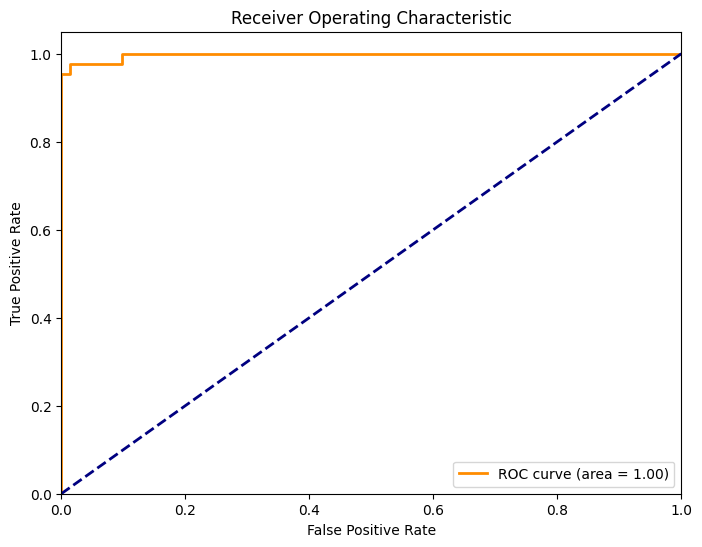

AUC Score: 0.99737962659679

Best Threshold based on F1 score:{'threshold': 0.4, 'confusion_matrix': array([[70,  1],
       [ 1, 42]]), 'precision': 0.9767441860465116, 'recall': 0.9767441860465116, 'f1_score': 0.9767441860465116}

The sigmoid function is defined as σ(z) = 1 / (1 + exp(-z)), where z is the linear combination of input features and model weights.
In logistic regression, the sigmoid function maps the linear combination of input features to a probability between 0 and 1.
The output of the sigmoid function represents the probability of the positive class (in our case, malignant tumors).
The threshold tunes the predicted class: if the predicted probability is above the threshold, we assign it to the positive class.


In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Define classification thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

results = []

for threshold in thresholds:
    # Generate predictions based on the threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Calculate evaluation metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'threshold': threshold,
        'confusion_matrix': cm,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc}")

# Analyze and store the best threshold (example: choosing the threshold with highest F1 score)
best_threshold_f1 = max(results, key=lambda x:x['f1_score'])
print(f"\nBest Threshold based on F1 score:{best_threshold_f1}")

# Explain the sigmoid function
print("\nThe sigmoid function is defined as σ(z) = 1 / (1 + exp(-z)), where z is the linear combination of input features and model weights.")
print("In logistic regression, the sigmoid function maps the linear combination of input features to a probability between 0 and 1.")
print("The output of the sigmoid function represents the probability of the positive class (in our case, malignant tumors).")
print("The threshold tunes the predicted class: if the predicted probability is above the threshold, we assign it to the positive class.")

**✅ Output Analysis:**
- The ROC Curve shows the trade-off between TPR and FPR.
- AUC score closer to 1 indicates better model performance.

## 📈 Step 7: ROC-AUC Curve and Threshold Tuning

**Reasoning**:
Visualize the confusion matrix and ROC-AUC curve using the results from the model evaluation.



In [39]:
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

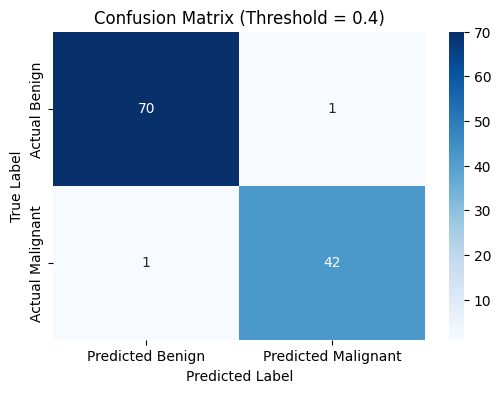

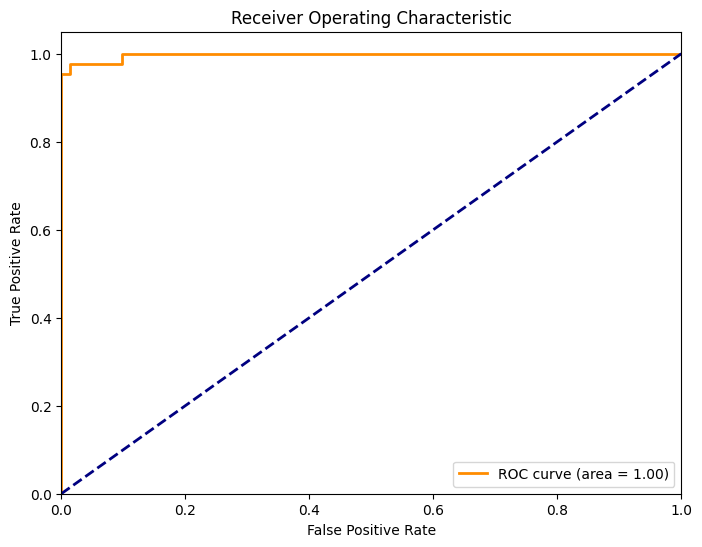

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' and 'roc_auc', 'fpr', 'tpr' are available from the previous step.

# Visualize the confusion matrix for the best threshold
best_cm = best_threshold_f1['confusion_matrix']
plt.figure(figsize=(6, 4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title(f'Confusion Matrix (Threshold = {best_threshold_f1["threshold"]})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**✅ Output Analysis:**
- The ROC Curve shows the trade-off between TPR and FPR.
- AUC score closer to 1 indicates better model performance.

---

## 🧾 **Summary**

### 📌 Q\&A: Key Concepts in Logistic Regression

1. **How does logistic regression differ from linear regression?**
   Logistic regression is used for classification tasks and predicts the probability of a categorical outcome (e.g., 0 or 1). In contrast, linear regression predicts a continuous numeric value. Logistic regression applies the **sigmoid function** to map linear outputs to probabilities between 0 and 1.

2. **What is the sigmoid function?**
   The sigmoid function is defined as $\sigma(z) = \frac{1}{1 + e^{-z}}$. It transforms the linear combination of inputs into a probability value between 0 and 1, enabling binary classification decisions.

3. **What is precision vs. recall?**

   * **Precision** is the proportion of true positive predictions among all predicted positives. It answers: *How many of the predicted positives are correct?*
   * **Recall** (sensitivity) is the proportion of true positives among all actual positives. It answers: *How many actual positives did we correctly identify?*

4. **What is the ROC-AUC curve?**
   The **ROC curve** plots the true positive rate (recall) against the false positive rate at various thresholds. The **AUC (Area Under the Curve)** summarizes this plot into a single score. A higher AUC indicates better overall classification performance.

5. **What is a confusion matrix?**
   A confusion matrix is a table that visualizes model performance by showing counts of:

   * **True Positives (TP):** Correctly predicted positives
   * **True Negatives (TN):** Correctly predicted negatives
   * **False Positives (FP):** Incorrectly predicted positives
   * **False Negatives (FN):** Missed actual positives

6. **What happens if classes are imbalanced?**
   In imbalanced datasets, the model may favor the majority class, leading to misleading accuracy. To address this, methods like **oversampling**, **undersampling**, or **class weighting** can be applied. This was not explicitly handled in the current analysis.

7. **How do you choose the classification threshold?**
   The threshold determines the cutoff for predicting class 1. It's usually 0.5 by default but can be tuned to optimize metrics like **F1-score**, depending on whether minimizing false positives or false negatives is more important. In this analysis, a threshold of **0.4** provided the best balance.

8. **Can logistic regression be used for multi-class problems?**
   Yes, logistic regression can be extended to handle multi-class problems using techniques like **One-vs-Rest (OvR)** or **multinomial logistic regression** with the softmax function. This aspect was not explored in the current analysis.

---

### 📊 Data Analysis Summary

* The dataset contained a redundant column `'Unnamed: 32'`, which was dropped due to containing only missing values.
* The target column `'diagnosis'` was label-encoded: **'B' (benign)** was mapped to **0**, and **'M' (malignant)** to **1**.
* The data was split into training and testing sets with an 80/20 ratio.
* Features were standardized using **StandardScaler** to improve model performance.
* A **Logistic Regression** model was trained and evaluated:

  * **ROC-AUC Score:** **0.9974**, indicating excellent class separation.
  * **F1-Score:** **0.9767** at a tuned classification threshold of **0.4**, showing a strong balance between precision and recall.

---

### 📌 Insights & Next Steps

* The logistic regression model demonstrates **exceptional performance** in classifying malignant tumors, suitable for medical screening tasks where both recall and precision are crucial.
* **Threshold tuning** significantly improved the F1-score, proving the importance of moving beyond default cutoffs in real-world applications.
* **Next Steps:**

  * Explore other models such as **Random Forest**, **Support Vector Machines**, or **Gradient Boosting** to compare results.
  * Investigate **feature importance** using model coefficients or advanced techniques like **SHAP values** to better understand influential factors in diagnosis.
  * Address potential **class imbalance** issues proactively in future analyses.
  * Consider **cross-validation** to further validate model generalization performance.

---

